In [1]:
import pandas
import numpy
from RexR import *
import _helpers
Rocket = RexR(datalocation = None, #'_data/genomic_data/data.pkl', 
              seed = 3123, 
              debug = False, 
              write_out=True,
              set_name = 'MELA') # data to read in ALL_10, or MELA
Rocket.load_probeset_data();

%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


++++++++++++++++++++++++++++++ Firing up RexR! ++++++++++++++++++++++++++++++


# Classification

In [6]:
AllResults = None

In [7]:
METHOD_LIST = ['ExtraTrees', 'RandomForest', 'GBM', 'AdaBoost', 'LR', 'SVM', 'MLNN', 'XGB'] # XGB
Runs = []
nruns = 2
SCALER = "minmax"
GROUPING = "mean"
DIM_TYPE = None # "LDA" # "PCA" # "PLS"
DIM_NUM = 1000
Results = None
ACC = pd.DataFrame()
Rocket.VIZ = False
for i in range(0, nruns):
    Rocket.SEED = np.random.randint(0,10000)
    MODELS  = []
    for idx, METHOD in enumerate(METHOD_LIST):
        preds, class_model, accuracy = Rocket.classify_treatment(model_type = METHOD, 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
        MODELS.append({'method': METHOD, 'model': class_model})
        ACC = ACC.append(accuracy, ignore_index= True)
        preds = [pred_[1]for pred_ in preds]
        #len(Rocket.DATA_merged[Rocket.DATA_merged["array-batch"].isin(["cohort 1", "cohort 2", "JB", "IA", "ALL-10"])])
        if Results is None:
            Results = Rocket.DATA_merged_processed.copy()
        Results['pred'] = preds
        Results['method'] = METHOD
        if idx == 0:
            AllResults = Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]]
        else:
            AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 
                                                    'pred', 
                                                    'method', 
                                                    Rocket.MODEL_PARAMETERS['target']]], 
                                      ignore_index = True)

    ####
    ####

    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "RVM", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "RVM"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]], ignore_index = True)

    ####
    ####

    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "DNN", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "DNN"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]],
                                   ignore_index = True)

    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "CNN", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "CNN"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]],
                                   ignore_index = True)
    
    
    AllResults[Rocket.MODEL_PARAMETERS['ID']] = AllResults[Rocket.MODEL_PARAMETERS['ID']].astype('str')
    AllResults = AllResults.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
    #AllResults[AllResults['Treatment_risk_group_in_ALL10'].notnull()]
    ####
    ####
    Runs.append(AllResults)



+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (83, 22215) and class vector (83,)
MODEL: ET accuracy:  0.915662650602 +/-: 0.000909496715897
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (83, 22215) and class vector (83,)
MODEL: RF accuracy:  0.89156626506 +/-: 0.00242139121096
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (83, 22215) and class 

 105 - L= 2.9572996 - Gamma=29.7996455 (M=  34) - s=0.0100
 106 - L= 2.9573000 - Gamma=29.8009225 (M=  34) - s=0.0100
 107 - L= 2.9573005 - Gamma=29.8092560 (M=  34) - s=0.0100
 108 - L= 2.9573011 - Gamma=29.7992953 (M=  34) - s=0.0100
 109 - L= 2.9573018 - Gamma=29.8014292 (M=  34) - s=0.0100
 110 - L= 2.9573021 - Gamma=29.8079277 (M=  34) - s=0.0100
 111 - L= 2.9573024 - Gamma=29.8041113 (M=  34) - s=0.0100
 112 - L= 2.9573027 - Gamma=29.7986754 (M=  34) - s=0.0100
 113 - L= 2.9573031 - Gamma=29.8000061 (M=  34) - s=0.0100
 114 - L= 2.9573035 - Gamma=29.8044332 (M=  34) - s=0.0100
 115 - L= 2.9573040 - Gamma=29.8149978 (M=  35) - s=0.0100
 116 - L= 2.9573044 - Gamma=29.8069109 (M=  35) - s=0.0100
 117 - L= 2.9573050 - Gamma=29.8161825 (M=  35) - s=0.0100
 118 - L= 2.9573055 - Gamma=29.8144294 (M=  35) - s=0.0100
 119 - L= 2.9573059 - Gamma=29.8186208 (M=  35) - s=0.0100
 120 - L= 2.9573062 - Gamma=29.8116392 (M=  35) - s=0.0100
 121 - L= 2.9573066 - Gamma=29.8130016 (M=  35) - s=0.01

/home/bramiozo/DEV/GIT/RexR/rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))
/home/bramiozo/DEV/GIT/RexR/rvm.py:289: RuntimeWarning: invalid value encountered in absolute
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))


  68 - L= 3.0172128 - Gamma=30.1611288 (M=  36) - s=0.0100
  69 - L= 3.0172980 - Gamma=30.2673147 (M=  36) - s=0.0100
  70 - L= 3.0174021 - Gamma=30.2092803 (M=  36) - s=0.0100
  71 - L= 3.0174381 - Gamma=30.2101779 (M=  36) - s=0.0100
  72 - L= 3.0174659 - Gamma=30.2785622 (M=  36) - s=0.0100
  73 - L= 3.0174953 - Gamma=30.2534637 (M=  36) - s=0.0100
  74 - L= 3.0175277 - Gamma=30.3116447 (M=  36) - s=0.0100
  75 - L= 3.0175740 - Gamma=30.2346244 (M=  36) - s=0.0100
  76 - L= 3.0176203 - Gamma=30.3017791 (M=  36) - s=0.0100
  77 - L= 3.0176455 - Gamma=30.3651395 (M=  37) - s=0.0100
  78 - L= 3.0176719 - Gamma=30.3664901 (M=  37) - s=0.0100
  79 - L= 3.0176986 - Gamma=30.4280441 (M=  37) - s=0.0100
  80 - L= 3.0177198 - Gamma=30.4049329 (M=  37) - s=0.0100
  81 - L= 3.0177372 - Gamma=30.4078010 (M=  37) - s=0.0100
  82 - L= 3.0177570 - Gamma=30.3529531 (M=  37) - s=0.0100
  83 - L= 3.0177845 - Gamma=30.4022224 (M=  37) - s=0.0100
  84 - L= 3.0178026 - Gamma=30.3752860 (M=  37) - s=0.01

  68 - L= 2.9857089 - Gamma=30.3599065 (M=  35) - s=0.0100
  69 - L= 2.9857765 - Gamma=30.3457010 (M=  35) - s=0.0100
  70 - L= 2.9858262 - Gamma=30.2557089 (M=  34) - s=0.0100
  71 - L= 2.9859363 - Gamma=30.3544311 (M=  34) - s=0.0100
  72 - L= 2.9860120 - Gamma=30.2961524 (M=  34) - s=0.0100
  73 - L= 2.9860849 - Gamma=30.2626591 (M=  34) - s=0.0100
  74 - L= 2.9861686 - Gamma=30.3199446 (M=  34) - s=0.0100
  75 - L= 2.9862513 - Gamma=30.2075088 (M=  34) - s=0.0100
  76 - L= 2.9863506 - Gamma=30.2225022 (M=  34) - s=0.0100
  77 - L= 2.9864304 - Gamma=30.1514611 (M=  34) - s=0.0100
  78 - L= 2.9865208 - Gamma=30.2099525 (M=  34) - s=0.0100
  79 - L= 2.9866379 - Gamma=30.2668431 (M=  34) - s=0.0100
  80 - L= 2.9867144 - Gamma=30.1842676 (M=  34) - s=0.0100
  81 - L= 2.9868063 - Gamma=30.0505207 (M=  33) - s=0.0100
  82 - L= 2.9870391 - Gamma=30.2575497 (M=  34) - s=0.0100
  83 - L= 2.9872264 - Gamma=30.1909190 (M=  34) - s=0.0100
  84 - L= 2.9872979 - Gamma=30.3123168 (M=  35) - s=0.01

  23 - L= 2.7069345 - Gamma=23.8346713 (M=  24) - s=0.0100
  24 - L= 2.8195625 - Gamma=24.7779865 (M=  25) - s=0.0100
  25 - L= 2.8927725 - Gamma=25.6948145 (M=  26) - s=0.0100
  26 - L= 2.9285511 - Gamma=26.5568518 (M=  27) - s=0.0100
  27 - L= 2.9635536 - Gamma=27.4185391 (M=  28) - s=0.0100
  28 - L= 2.9814295 - Gamma=27.4134019 (M=  28) - s=0.0100
  29 - L= 2.9944074 - Gamma=28.1687307 (M=  29) - s=0.0100
  30 - L= 3.0054065 - Gamma=28.1683903 (M=  29) - s=0.0100
  31 - L= 3.0139978 - Gamma=28.1687645 (M=  29) - s=0.0100
  32 - L= 3.0220696 - Gamma=28.1713632 (M=  29) - s=0.0100
  33 - L= 3.0295731 - Gamma=28.8353123 (M=  30) - s=0.0100
  34 - L= 3.0366991 - Gamma=28.8367961 (M=  30) - s=0.0100
  35 - L= 3.0423513 - Gamma=28.8338503 (M=  30) - s=0.0100
  36 - L= 3.0458639 - Gamma=29.3911778 (M=  31) - s=0.0100
  37 - L= 3.0479005 - Gamma=29.8655929 (M=  32) - s=0.0100
  38 - L= 3.0497771 - Gamma=29.8759479 (M=  32) - s=0.0100
  39 - L= 3.0513921 - Gamma=29.8761637 (M=  32) - s=0.01

Initial alpha = [[ 0.02967984]]
   1 - L=-440.0027237 - Gamma= 1.9999516 (M=   2) - s=0.0100
   2 - L=-242.1600900 - Gamma= 2.9999127 (M=   3) - s=0.0100
   3 - L=-178.7680600 - Gamma= 3.9997714 (M=   4) - s=0.0100
   4 - L=-136.5609996 - Gamma= 4.9995626 (M=   5) - s=0.0100
   5 - L=-108.9337577 - Gamma= 5.9992851 (M=   6) - s=0.0100
   6 - L=-81.4387663 - Gamma= 6.9990076 (M=   7) - s=0.0100
   7 - L=-61.3024072 - Gamma= 7.9985828 (M=   8) - s=0.0100
   8 - L=-47.1007120 - Gamma= 8.9980313 (M=   9) - s=0.0100
   9 - L=-34.9864936 - Gamma= 9.9973794 (M=  10) - s=0.0100
  10 - L=-25.6355473 - Gamma=10.9965190 (M=  11) - s=0.0100
  11 - L=-19.4837866 - Gamma=11.9952301 (M=  12) - s=0.0100
  12 - L=-12.2524960 - Gamma=12.9939785 (M=  13) - s=0.0100
  13 - L=-8.9296024 - Gamma=13.9916182 (M=  14) - s=0.0100
  14 - L=-6.2652346 - Gamma=14.9887325 (M=  15) - s=0.0100
  15 - L=-4.1545445 - Gamma=15.9845366 (M=  16) - s=0.0100
  16 - L=-2.7428045 - Gamma=16.9791109 (M=  17) - s=0.0100
  17 - 

 179 - L= 2.9456521 - Gamma=31.7415046 (M=  39) - s=0.0100
 180 - L= 2.9456524 - Gamma=31.7354439 (M=  39) - s=0.0100
 181 - L= 2.9456528 - Gamma=31.7427482 (M=  39) - s=0.0100
 182 - L= 2.9456531 - Gamma=31.7498089 (M=  39) - s=0.0100
 183 - L= 2.9456535 - Gamma=31.7415701 (M=  39) - s=0.0100
 184 - L= 2.9456538 - Gamma=31.7417912 (M=  39) - s=0.0100
 185 - L= 2.9456540 - Gamma=31.7365318 (M=  39) - s=0.0100
 186 - L= 2.9456543 - Gamma=31.7443715 (M=  39) - s=0.0100
 187 - L= 2.9456546 - Gamma=31.7409304 (M=  39) - s=0.0100
 188 - L= 2.9456549 - Gamma=31.7477716 (M=  39) - s=0.0100
 189 - L= 2.9456551 - Gamma=31.7476388 (M=  39) - s=0.0100
 190 - L= 2.9456553 - Gamma=31.7468807 (M=  39) - s=0.0100
 191 - L= 2.9456555 - Gamma=31.7445831 (M=  39) - s=0.0100
 192 - L= 2.9456557 - Gamma=31.7495123 (M=  39) - s=0.0100
 193 - L= 2.9456560 - Gamma=31.7557739 (M=  39) - s=0.0100
 194 - L= 2.9456562 - Gamma=31.7503640 (M=  39) - s=0.0100
 195 - L= 2.9456564 - Gamma=31.7447998 (M=  39) - s=0.01

 121 - L= 2.9747801 - Gamma=39.5739591 (M=  49) - s=0.0100
 122 - L= 2.9748142 - Gamma=39.4918693 (M=  48) - s=0.0100
 123 - L= 2.9748342 - Gamma=39.4928696 (M=  48) - s=0.0100
 124 - L= 2.9748529 - Gamma=39.4985071 (M=  48) - s=0.0100
 125 - L= 2.9748713 - Gamma=39.4962197 (M=  48) - s=0.0100
 126 - L= 2.9748883 - Gamma=39.4884431 (M=  48) - s=0.0100
 127 - L= 2.9749046 - Gamma=39.4712250 (M=  48) - s=0.0100
 128 - L= 2.9749209 - Gamma=39.5210952 (M=  48) - s=0.0100
 129 - L= 2.9749423 - Gamma=39.4566931 (M=  47) - s=0.0100
 130 - L= 2.9749699 - Gamma=39.5251260 (M=  47) - s=0.0100
 131 - L= 2.9749939 - Gamma=39.4820914 (M=  47) - s=0.0100
 132 - L= 2.9750203 - Gamma=39.4049856 (M=  47) - s=0.0100
 133 - L= 2.9750462 - Gamma=39.4845255 (M=  48) - s=0.0100
 134 - L= 2.9750661 - Gamma=39.5358484 (M=  48) - s=0.0100
 135 - L= 2.9750903 - Gamma=39.4632014 (M=  47) - s=0.0100
 136 - L= 2.9751176 - Gamma=39.5251347 (M=  47) - s=0.0100
 137 - L= 2.9751503 - Gamma=39.4982343 (M=  47) - s=0.01

67/67 [==============================] - 0s - loss: 0.6291 - acc: 0.6269 - val_loss: 0.5340 - val_acc: 0.6250
Epoch 5/5
67/67 [==============================] - 0s - loss: 0.6035 - acc: 0.6119 - val_loss: 0.6734 - val_acc: 0.6250
MODEL: DNN accuracy:  0.626506024096 +/-: 0.000139229253418
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (83, 22215, 1) and class vector (83,)
Train on 65 samples, validate on 18 samples
Epoch 1/5
65/65 [==============================] - 2s - loss: 1.3410 - acc: 0.5692 - val_loss: 0.5957 - val_acc: 0.7778
Epoch 2/5
65/65 [==============================] - 1s - loss: 0.6366 - acc: 0.6769 - val_loss: 0.5955 - val_acc: 0.8333
Epoch 3/5
65/65 [==============================] - 2s - loss: 0.5143 - acc: 0.7231 - val_loss: 0.5811 - val

  51 - L= 2.9546274 - Gamma=29.4458723 (M=  32) - s=0.0100
  52 - L= 2.9550852 - Gamma=29.7074842 (M=  33) - s=0.0100
  53 - L= 2.9554605 - Gamma=29.7085850 (M=  33) - s=0.0100
  54 - L= 2.9556697 - Gamma=29.7100651 (M=  33) - s=0.0100
  55 - L= 2.9558643 - Gamma=29.7099369 (M=  33) - s=0.0100
  56 - L= 2.9560593 - Gamma=29.7564134 (M=  33) - s=0.0100
  57 - L= 2.9562465 - Gamma=29.8153060 (M=  33) - s=0.0100
  58 - L= 2.9564098 - Gamma=29.8489796 (M=  33) - s=0.0100
  59 - L= 2.9565668 - Gamma=29.8484208 (M=  33) - s=0.0100
  60 - L= 2.9567052 - Gamma=29.8530666 (M=  33) - s=0.0100
  61 - L= 2.9568144 - Gamma=29.8524477 (M=  33) - s=0.0100
  62 - L= 2.9569156 - Gamma=29.8436484 (M=  33) - s=0.0100
  63 - L= 2.9569937 - Gamma=29.7927052 (M=  33) - s=0.0100
  64 - L= 2.9570603 - Gamma=29.7182726 (M=  33) - s=0.0100
  65 - L= 2.9571081 - Gamma=29.7139674 (M=  33) - s=0.0100
  66 - L= 2.9571520 - Gamma=29.8067017 (M=  34) - s=0.0100
  67 - L= 2.9571860 - Gamma=29.7639720 (M=  34) - s=0.01

Initial alpha = [[ 0.02981614]]
   1 - L=-385.5067142 - Gamma= 1.9999487 (M=   2) - s=0.0100
   2 - L=-240.6675310 - Gamma= 2.9998955 (M=   3) - s=0.0100
   3 - L=-171.5434460 - Gamma= 3.9997575 (M=   4) - s=0.0100
   4 - L=-128.9584985 - Gamma= 4.9995422 (M=   5) - s=0.0100
   5 - L=-99.9485300 - Gamma= 5.9992707 (M=   6) - s=0.0100
   6 - L=-81.4869898 - Gamma= 6.9988220 (M=   7) - s=0.0100
   7 - L=-58.4318482 - Gamma= 7.9983980 (M=   8) - s=0.0100
   8 - L=-45.2354482 - Gamma= 8.9977739 (M=   9) - s=0.0100
   9 - L=-32.4479860 - Gamma= 9.9971114 (M=  10) - s=0.0100
  10 - L=-23.9898362 - Gamma=10.9959995 (M=  11) - s=0.0100
  11 - L=-18.6699226 - Gamma=11.9945022 (M=  12) - s=0.0100
  12 - L=-12.0332768 - Gamma=12.9931371 (M=  13) - s=0.0100
  13 - L=-7.4492399 - Gamma=13.9913682 (M=  14) - s=0.0100
  14 - L=-4.8118829 - Gamma=14.9882244 (M=  15) - s=0.0100
  15 - L=-2.6913316 - Gamma=15.9841502 (M=  16) - s=0.0100
  16 - L=-1.0643705 - Gamma=16.9790619 (M=  17) - s=0.0100
  17 - L

/home/bramiozo/DEV/GIT/RexR/rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))
/home/bramiozo/DEV/GIT/RexR/rvm.py:289: RuntimeWarning: invalid value encountered in absolute
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))



  69 - L= 3.0172980 - Gamma=30.2673147 (M=  36) - s=0.0100
  70 - L= 3.0174021 - Gamma=30.2092803 (M=  36) - s=0.0100
  71 - L= 3.0174381 - Gamma=30.2101779 (M=  36) - s=0.0100
  72 - L= 3.0174659 - Gamma=30.2785622 (M=  36) - s=0.0100
  73 - L= 3.0174953 - Gamma=30.2534637 (M=  36) - s=0.0100
  74 - L= 3.0175277 - Gamma=30.3116447 (M=  36) - s=0.0100
  75 - L= 3.0175740 - Gamma=30.2346244 (M=  36) - s=0.0100
  76 - L= 3.0176203 - Gamma=30.3017791 (M=  36) - s=0.0100
  77 - L= 3.0176455 - Gamma=30.3651395 (M=  37) - s=0.0100
  78 - L= 3.0176719 - Gamma=30.3664901 (M=  37) - s=0.0100
  79 - L= 3.0176986 - Gamma=30.4280441 (M=  37) - s=0.0100
  80 - L= 3.0177198 - Gamma=30.4049329 (M=  37) - s=0.0100
  81 - L= 3.0177372 - Gamma=30.4078010 (M=  37) - s=0.0100
  82 - L= 3.0177570 - Gamma=30.3529531 (M=  37) - s=0.0100
  83 - L= 3.0177845 - Gamma=30.4022224 (M=  37) - s=0.0100
  84 - L= 3.0178026 - Gamma=30.3752860 (M=  37) - s=0.0100
  85 - L= 3.0178186 - Gamma=30.3802077 (M=  37) - s=0.0

  51 - L= 2.9833026 - Gamma=30.2366566 (M=  34) - s=0.0100
  52 - L= 2.9835426 - Gamma=30.2646567 (M=  34) - s=0.0100
  53 - L= 2.9837616 - Gamma=30.2646819 (M=  34) - s=0.0100
  54 - L= 2.9839404 - Gamma=30.2615407 (M=  34) - s=0.0100
  55 - L= 2.9841120 - Gamma=30.4318191 (M=  35) - s=0.0100
  56 - L= 2.9844645 - Gamma=30.2003097 (M=  35) - s=0.0100
  57 - L= 2.9846472 - Gamma=30.2007397 (M=  35) - s=0.0100
  58 - L= 2.9847779 - Gamma=30.2007774 (M=  35) - s=0.0100
  59 - L= 2.9848869 - Gamma=30.2030721 (M=  35) - s=0.0100
  60 - L= 2.9849923 - Gamma=30.2038261 (M=  35) - s=0.0100
  61 - L= 2.9850952 - Gamma=30.2056240 (M=  35) - s=0.0100
  62 - L= 2.9851868 - Gamma=30.2056816 (M=  35) - s=0.0100
  63 - L= 2.9852771 - Gamma=30.3109558 (M=  35) - s=0.0100
  64 - L= 2.9853511 - Gamma=30.3865685 (M=  35) - s=0.0100
  65 - L= 2.9854854 - Gamma=30.3216637 (M=  35) - s=0.0100
  66 - L= 2.9855611 - Gamma=30.2983001 (M=  35) - s=0.0100
  67 - L= 2.9856276 - Gamma=30.2931613 (M=  35) - s=0.01

   6 - L=-68.0388460 - Gamma= 6.9988012 (M=   7) - s=0.0100
   7 - L=-55.0434086 - Gamma= 7.9981930 (M=   8) - s=0.0100
   8 - L=-43.9062631 - Gamma= 8.9974938 (M=   9) - s=0.0100
   9 - L=-30.0686675 - Gamma= 9.9968330 (M=  10) - s=0.0100
  10 - L=-23.3801276 - Gamma=10.9956317 (M=  11) - s=0.0100
  11 - L=-17.9487107 - Gamma=11.9940590 (M=  12) - s=0.0100
  12 - L=-13.0531783 - Gamma=12.9924731 (M=  13) - s=0.0100
  13 - L=-8.5331744 - Gamma=13.9907153 (M=  14) - s=0.0100
  14 - L=-5.5419812 - Gamma=14.9881335 (M=  15) - s=0.0100
  15 - L=-2.9649073 - Gamma=15.9843547 (M=  16) - s=0.0100
  16 - L=-1.0980871 - Gamma=16.9800461 (M=  17) - s=0.0100
  17 - L= 0.0497685 - Gamma=17.9734399 (M=  18) - s=0.0100
  18 - L= 0.8987812 - Gamma=18.9643689 (M=  19) - s=0.0100
  19 - L= 1.6004262 - Gamma=19.9533550 (M=  20) - s=0.0100
  20 - L= 1.9726012 - Gamma=20.9332944 (M=  21) - s=0.0100
  21 - L= 2.3413328 - Gamma=21.9131129 (M=  22) - s=0.0100
  22 - L= 2.5537400 - Gamma=22.8805160 (M=  23) -

Initial alpha = [[ 0.02967984]]
   1 - L=-440.0027237 - Gamma= 1.9999516 (M=   2) - s=0.0100
   2 - L=-242.1600900 - Gamma= 2.9999127 (M=   3) - s=0.0100
   3 - L=-178.7680600 - Gamma= 3.9997714 (M=   4) - s=0.0100
   4 - L=-136.5609996 - Gamma= 4.9995626 (M=   5) - s=0.0100
   5 - L=-108.9337577 - Gamma= 5.9992851 (M=   6) - s=0.0100
   6 - L=-81.4387663 - Gamma= 6.9990076 (M=   7) - s=0.0100
   7 - L=-61.3024072 - Gamma= 7.9985828 (M=   8) - s=0.0100
   8 - L=-47.1007120 - Gamma= 8.9980313 (M=   9) - s=0.0100
   9 - L=-34.9864936 - Gamma= 9.9973794 (M=  10) - s=0.0100
  10 - L=-25.6355473 - Gamma=10.9965190 (M=  11) - s=0.0100
  11 - L=-19.4837866 - Gamma=11.9952301 (M=  12) - s=0.0100
  12 - L=-12.2524960 - Gamma=12.9939785 (M=  13) - s=0.0100
  13 - L=-8.9296024 - Gamma=13.9916182 (M=  14) - s=0.0100
  14 - L=-6.2652346 - Gamma=14.9887325 (M=  15) - s=0.0100
  15 - L=-4.1545445 - Gamma=15.9845366 (M=  16) - s=0.0100
  16 - L=-2.7428045 - Gamma=16.9791109 (M=  17) - s=0.0100
  17 - 

 180 - L= 2.9456524 - Gamma=31.7354439 (M=  39) - s=0.0100
 181 - L= 2.9456528 - Gamma=31.7427482 (M=  39) - s=0.0100
 182 - L= 2.9456531 - Gamma=31.7498089 (M=  39) - s=0.0100
 183 - L= 2.9456535 - Gamma=31.7415701 (M=  39) - s=0.0100
 184 - L= 2.9456538 - Gamma=31.7417912 (M=  39) - s=0.0100
 185 - L= 2.9456540 - Gamma=31.7365318 (M=  39) - s=0.0100
 186 - L= 2.9456543 - Gamma=31.7443715 (M=  39) - s=0.0100
 187 - L= 2.9456546 - Gamma=31.7409304 (M=  39) - s=0.0100
 188 - L= 2.9456549 - Gamma=31.7477716 (M=  39) - s=0.0100
 189 - L= 2.9456551 - Gamma=31.7476388 (M=  39) - s=0.0100
 190 - L= 2.9456553 - Gamma=31.7468807 (M=  39) - s=0.0100
 191 - L= 2.9456555 - Gamma=31.7445831 (M=  39) - s=0.0100
 192 - L= 2.9456557 - Gamma=31.7495123 (M=  39) - s=0.0100
 193 - L= 2.9456560 - Gamma=31.7557739 (M=  39) - s=0.0100
 194 - L= 2.9456562 - Gamma=31.7503640 (M=  39) - s=0.0100
 195 - L= 2.9456564 - Gamma=31.7447998 (M=  39) - s=0.0100
 196 - L= 2.9456566 - Gamma=31.7510846 (M=  39) - s=0.01

 133 - L= 2.9750462 - Gamma=39.4845255 (M=  48) - s=0.0100
 134 - L= 2.9750661 - Gamma=39.5358484 (M=  48) - s=0.0100
 135 - L= 2.9750903 - Gamma=39.4632014 (M=  47) - s=0.0100
 136 - L= 2.9751176 - Gamma=39.5251347 (M=  47) - s=0.0100
 137 - L= 2.9751503 - Gamma=39.4982343 (M=  47) - s=0.0100
 138 - L= 2.9751812 - Gamma=39.4597593 (M=  47) - s=0.0100
 139 - L= 2.9752343 - Gamma=39.5616506 (M=  47) - s=0.0100
 140 - L= 2.9752717 - Gamma=39.5017486 (M=  47) - s=0.0100
 141 - L= 2.9753064 - Gamma=39.5645439 (M=  47) - s=0.0100
 142 - L= 2.9753346 - Gamma=39.6149057 (M=  47) - s=0.0100
 143 - L= 2.9753662 - Gamma=39.5719567 (M=  47) - s=0.0100
 144 - L= 2.9754023 - Gamma=39.6262832 (M=  47) - s=0.0100
 145 - L= 2.9754307 - Gamma=39.6929822 (M=  47) - s=0.0100
 146 - L= 2.9754598 - Gamma=39.6343051 (M=  47) - s=0.0100
 147 - L= 2.9754895 - Gamma=39.6449043 (M=  47) - s=0.0100
 148 - L= 2.9755165 - Gamma=39.6009412 (M=  47) - s=0.0100
 149 - L= 2.9755528 - Gamma=39.6523318 (M=  47) - s=0.01

65/65 [==============================] - 2s - loss: 0.7119 - acc: 0.6154 - val_loss: 0.6330 - val_acc: 0.6111
Epoch 3/5
65/65 [==============================] - 2s - loss: 0.5346 - acc: 0.8308 - val_loss: 2.5953 - val_acc: 0.6111
Epoch 4/5
65/65 [==============================] - 2s - loss: 0.6853 - acc: 0.7692 - val_loss: 0.4700 - val_acc: 0.6111
Epoch 5/5
65/65 [==============================] - 1s - loss: 0.2773 - acc: 0.9231 - val_loss: 0.4525 - val_acc: 0.6111
Train on 66 samples, validate on 17 samples
Epoch 1/5
66/66 [==============================] - 2s - loss: 0.2356 - acc: 0.9242 - val_loss: 0.0467 - val_acc: 1.0000
Epoch 2/5
66/66 [==============================] - 2s - loss: 0.1900 - acc: 0.9394 - val_loss: 0.0349 - val_acc: 1.0000
Epoch 3/5
66/66 [==============================] - 2s - loss: 0.1371 - acc: 0.9545 - val_loss: 0.0681 - val_acc: 1.0000
Epoch 4/5
66/66 [==============================] - 2s - loss: 0.1221 - acc: 0.9545 - val_loss: 0.0435 - val_acc: 1.0000
Epoch 

In [9]:
print("Accuracy on average: {} +- {}, median: {}+-{}".format(ACC.mean()[0], ACC.mean()[1], ACC.median()[0], ACC.median()[1]))
print("+"*40)
print(ACC)

Accuracy on average: 0.8806133625410731 +- 0.004423644581547632, median: 0.9156626506024096+-0.002201458800000379
++++++++++++++++++++++++++++++++++++++++
         acc model       var
0   0.915663    ET  0.000909
1   0.891566    RF  0.002421
2   0.915663   GBM  0.000909
3   0.927711   ADA  0.003412
4   0.939759    LR  0.001465
5   0.939759   SVM  0.001465
6   0.879518  MLNN  0.015516
7   0.927711   XGB  0.002127
8   0.771084   RVM  0.004871
9   0.626506   DNN  0.000139
10  0.951807   CNN  0.003190
11  0.939759    ET  0.003148
12  0.915663    RF  0.000791
13  0.903614   GBM  0.002276
14  0.927711   ADA  0.003412
15  0.939759    LR  0.001465
16  0.939759   SVM  0.001465
17  0.879518  MLNN  0.015516
18  0.927711   XGB  0.002127
19  0.771084   RVM  0.004871
20  0.626506   DNN  0.000139
21  0.915663   CNN  0.025685


In [5]:
###########
###########
##Runs.append(AllResults)
final_df = pandas.DataFrame()
for idx, df in enumerate(Runs):
    df['run'] = idx
    final_df = final_df.append(df, ignore_index = True)
#final_df = final_df.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
final_df['pred']= pandas.to_numeric(final_df['pred'])


In [58]:
final_df_agg = final_df.groupby([Rocket.MODEL_PARAMETERS['ID']], as_index=True).agg({'pred': [numpy.mean, numpy.median, numpy.std]})['pred']

final_df.to_csv("out/patient_results_"+Rocket.SET_NAME+".csv")
final_df_agg.to_csv("out/patient_results_agg_"+Rocket.SET_NAME+".csv")

# Top genomes

In [ ]:
# loop through models..
### Tree weights
top_genomes_weights = pandas.DataFrame()
#top_genomes.index = Rocket.DATA_merged_processed
for mod in MODELS:
    if(mod['method'] in ['RandomForest', 'GBM', 'AdaBoost', 'ExtraTrees']): # RF, ET, GBM, ADA
        top_genomes_weights[mod['method']]=mod['model'].feature_importances_
        # column normalise
        top_genomes_weights[mod['method']] = top_genomes_weights[mod['method']]/top_genomes_weights[mod['method']].max()
        
top_genomes_weights.index = Rocket.DATA_merged_processed.drop(['target', 'ID'], axis=1).columns
#top_genomes['ALL'] = top_genomes.sum(axis=1)
top_genomes_weights['MED'] = top_genomes_weights.median(axis=1)
top_genomes_weights = top_genomes_weights.sort_values(by='MED', ascending=False)
       
### Coefficients
top_genomes_coeffs = pandas.DataFrame()
for mod in MODELS:
    if(mod['method'] in ['LR', 'SVM']):
        top_genomes_coeffs[mod['method']] = mod['model'].coef_[0,:]
        top_genomes_coeffs[mod['method']] = top_genomes_coeffs[mod['method']]/top_genomes_coeffs[mod['method']].max() #\
                                                               #  -top_genomes[mod['method']].min())
                                                                 #+numpy.abs(top_genomes[mod['method']].min())
top_genomes_coeffs.index = Rocket.DATA_merged_processed.drop(['target', 'ID'], axis=1).columns
#top_genomes['ALL'] = top_genomes.sum(axis=1)
top_genomes_coeffs['MEAN'] = top_genomes_coeffs.mean(axis=1)
top_genomes_coeffs = top_genomes_coeffs.sort_values(by='MEAN', ascending=False)


In [ ]:
top_genomes_coeffs.to_csv("C:/Users/Bram van Es/DEV/RexR/out/coeffs_"+Rocket.SET_NAME+".csv")

In [ ]:
top_genomes_weights.to_csv("C:/Users/Bram van Es/DEV/RexR/out/weights_"+Rocket.SET_NAME+".csv")

In [18]:
RF9 = top_genomes_weights['RandomForest'].quantile(q=0.9)
GBM9 = top_genomes_weights['GBM'].quantile(q=0.9)
ADA9 = top_genomes_weights['AdaBoost'].quantile(q=0.9)
ET9 = top_genomes_weights['ExtraTrees'].quantile(q=0.9)
Overlapping_genomes = set(top_genomes_weights.loc[top_genomes_weights['RandomForest']>RF9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['GBM']>GBM9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['AdaBoost']>ADA9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['ExtraTrees']>ET9].index.values)

# Patient clustering

In [2]:
from math import*
#from scipy.dspatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from decimal import Decimal
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from time import time
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
#TransPosed = Rocket.DATA_all_samples.T # all microarrays, may be multiple per patient versus all probesets, may be multiple per genome
Normal = Rocket.DATA_merged_processed.loc[:, (Rocket.DATA_merged_processed.columns !='target') & 
                                             (Rocket.DATA_merged_processed.columns !='ID')]
#AllNormal = Rocket.DATA_merged
#probeset_weights = Rocket.get_probeset_weights(method = )

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Markov clustering

In [10]:
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'cosine', normalised = True, inflation = 2, minkowski_dim=1)
##### apply Markov clustering
#######################
# non-distributed, non-sparse version, only for small-sized problems (N is order 1000)
e = 2
r = 2 
epsilon = 1e-7
convergence = 0.001
num_iter = 10
Orientation = 'col' # columnwise or rowwise

# add loop
def add_loop(df_matrix, value=0): 
    for i in df_matrix.index:
        df_matrix.loc[i, i] = value
    return df_matrix
patient_sim = add_loop(patient_sim, 1)
patient_sim = patient_sim - epsilon

def normalise(sim, type = 'col'):
    if(type == 'col'):
        # column normalisation
        for variable in sim.keys():
            col_vec = sim[variable]
            sum_val = sum([p for p in col_vec])
            sim[variable] = sim[variable]/sum_val
    elif (type == 'row'):
        # row normalisation
        for variable in sim.keys():
            row_vec = sim.loc[variable, :]
            sum_val = sum([p for p in row_vec])
            sim.loc[variable,:] = sim.loc[variable,:]/sum_val
    return sim

# step E: expansion, get the nth power of the matrix
def expansion(sim):
    X = numpy.array(sim)
    VarList = sim.keys()
    if e == 1:
        return sim
    elif e > 1:        
        return pandas.DataFrame(numpy.linalg.matrix_power(X, e), index = VarList, columns = VarList)
     
# step I: inflation, per column raise by rth power and column normalise
def inflation(sim, type = 'col'):    
    if type == 'col':
        Axis = 0
    elif type == 'row':
        Axis = 1
    return sim.apply(lambda x: x**r/sum(x**r), axis = Axis)

# remove weak connections, values < epsilon
def clean(sim):
    return sim.applymap(lambda x:0 if x<epsilon else x)
    
def difference(old, new):
    # relative zeroes over entire array
    #return (new.apply(lambda x: numpy.ceil(x-epsilon)) - old.apply(lambda x: numpy.ceil(x-epsilon))).sum().sum()/len(old)**2    
    return abs(new - old).sum().sum()/len(old)**2    

#patient_sim = normalise(patient_sim, type = Orientation)
_sim_a = patient_sim
for i in range(0,num_iter):
    # repeat E and I until convergence, the row-wise elements form the clusters.
    _sim_b = clean(inflation(expansion(_sim_a), type = Orientation))
    _sim_a = normalise(_sim_a, type = Orientation)
    #if ((difference(_sim_a, _sim_b)) < convergence) & (i>0):
    #    print(difference(_sim_a, _sim_b))
    #    print("CONVERGED after ", i, " iterations")
    #    break;
    _sim_a = _sim_b

result_mcl = clean(_sim_b)
result_mcl.loc[result_mcl.loc['9827_corr2.CEL',:]>epsilon, '9827_corr2.CEL']

Series([], Name: 9827_corr2.CEL, dtype: float64)

## Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'pearson', normalised = False, inflation=1, minkowski_dim=1)
##### apply Affinity Propagation
#######################
X = numpy.array(patient_sim)
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
patient_clusters = patient_sim.keys()[cluster_centers_indices].values
patient_cluster_members = af.labels_
print("There are {} patient clusters".format(n_clusters))

There are 5 patient clusters


In [28]:
AggResults = Rocket.DATA_merged
AggResults = _helpers._preprocess(AggResults, Rclass = Rocket)
#AggResults = _helpers._group_patients(AggResults, method = 'mean')
AggResults['cluster_ap'] = patient_cluster_members

#AggResults.groupby(['Treatment risk group in ALL10', 'cluster_ap']).agg({'Microarray file': pandas.Series.nunique})


In [11]:
AggResults['FU_RFS'] = pandas.to_numeric(AggResults['FU_RFS'])
AggResults['FU_EFS'] = pandas.to_numeric(AggResults['FU_EFS'])
AggResults['FU_OS'] = pandas.to_numeric(AggResults['FU_OS'])
AggResults['WhiteBloodCellcount'] = pandas.to_numeric(AggResults['WhiteBloodCellcount'])
AggResults['Age'] = pandas.to_numeric(AggResults['Age'])
AggResults['Gender'] = pandas.to_numeric(AggResults['Gender'])
AggResults['code_RFS']= pandas.to_numeric(AggResults['code_RFS'])
AggResults['code_EFS']= pandas.to_numeric(AggResults['code_EFS'])
AggResults['code_OS']= pandas.to_numeric(AggResults['code_OS'])

AggResults['mutations_NOTCH_pathway'] = pandas.to_numeric(AggResults['mutations_NOTCH_pathway'])
AggResults['mutations_PTEN_AKT_pathway'] = pandas.to_numeric(AggResults['mutations_PTEN_AKT_pathway'])
AggResults['mutations_IL7R_pathway'] = pandas.to_numeric(AggResults['mutations_IL7R_pathway'])
#AggResults.replace(to_replace=9999, value=0.5, inplace=True)
AggResults[['mutations_NOTCH_pathway', 
            'mutations_PTEN_AKT_pathway', 
            'mutations_IL7R_pathway']] = AggResults[['mutations_NOTCH_pathway', 
                                                    'mutations_PTEN_AKT_pathway', 
                                                    'mutations_IL7R_pathway']].replace([9999],[numpy.nan],
                                                                                       inplace=False)

c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [12]:
AggResults['comb_mutations_NOTCH_IL7R'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_NOTCH_PTEN'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_PTEN_AKT_pathway']
AggResults['comb_mutations_IL7R_PTEN'] =  AggResults['mutations_PTEN_AKT_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_IL7R_PTEN_NOTCH'] =  AggResults['mutations_PTEN_AKT_pathway']\
                                                + AggResults['mutations_IL7R_pathway']\
                                                + AggResults['mutations_NOTCH_pathway']


patient_count = AggResults.groupby(['cluster_ap']).agg({'labnr_patient': pandas.Series.nunique})
Clustered_by_patients_whitebloodcells = AggResults[AggResults['WhiteBloodCellcount'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'WhiteBloodCellcount': numpy.mean,
    'Age': numpy.mean, 
    'Gender': numpy.mean})

# Cancer_gene
# Treatment_protocol
# Treatment_risk_group_in_ALL_10

Clustered_by_patients_CODE = AggResults.groupby(['cluster_ap']).agg(
    {'code_RFS': numpy.mean, 
     'code_EFS': numpy.mean,
     'code_OS': numpy.mean})

Clustered_by_patients_FU_RFS = AggResults[AggResults['FU_RFS'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'FU_RFS': numpy.median, 
     'FU_EFS': numpy.median,
     'FU_OS': numpy.median})
Clustered_by_patients_NotchPath = AggResults[AggResults['mutations_NOTCH_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_NOTCH_pathway': numpy.mean})
Clustered_by_patients_IL7RPath = AggResults[AggResults['mutations_IL7R_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_IL7R_pathway': numpy.mean})
Clustered_by_patients_PTENAKTPath = AggResults[AggResults['mutations_PTEN_AKT_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_PTEN_AKT_pathway': numpy.mean})
Clustered_by_patients_comb_NOTCH_IL7R = AggResults[AggResults['comb_mutations_NOTCH_IL7R'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_IL7R': numpy.mean})
Clustered_by_patients_comb_NOTCH_PTEN = AggResults[AggResults['comb_mutations_NOTCH_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN = AggResults[AggResults['comb_mutations_IL7R_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN_NOTCH = AggResults[AggResults['comb_mutations_IL7R_PTEN_NOTCH'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN_NOTCH': numpy.mean})


c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
cluster_agg = pandas.merge(Clustered_by_patients_whitebloodcells, Clustered_by_patients_CODE, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN_NOTCH, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_IL7R, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_PTEN, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_FU_RFS, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_IL7RPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_NotchPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_PTENAKTPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, patient_count, how='inner', left_index=True, right_index=True)


In [ ]:
print("Cluster centers:",patient_sim.keys()[cluster_centers_indices].values)
print(patient_cluster_members)

plt.close('all')
plt.figure(figsize=(14,9))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = patient_cluster_members == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', 
             label = patient_sim.keys()[cluster_centers_indices[k]])
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.legend()
        
plt.title('Estimated number of clusters from Affinity Propagation: %d' % n_clusters)
plt.show()

In [19]:
##### CREATE graph from similarity matrix
##################
# nodes
VarList = TransPosed.keys()
nodes = []
node_index = 0
for patient_name in VarList:
    nodes.append((node_index, {'name': patient_name}))
    node_index = node_index + 1

edges = []
# edges
patient_sim = patient_similarity(Normal, sim_type = 'pearson', normalised = True, inflation=2)
node_index_x = 0
node_index_y = 0
for patient_name_x in VarList:
    for patient_name_y in VarList:        
        edges.append((node_index_x, node_index_y, patient_sim.iloc[node_index_x, node_index_y]))
        node_index_y = node_index_y + 1
    node_index_x = node_index_x + 1
    node_index_y = 0

In [20]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges, weight = 'weight')

c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

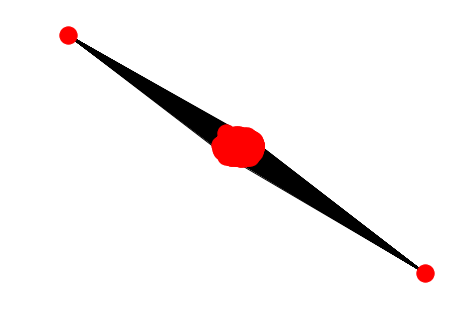

In [23]:
##### apply Spring-force
#######################
pos = nx.spring_layout(G, k = None, dim = 3, scale = 1.0)
nx.draw_spring(G, k = 30, dim = 2, scale = 1.0, iterations =1500)
plt.show()

In [ ]:
##### APPLY community detector
# maximize betweenness and modularity
##################################


In [12]:
##### LOAD IN DATA
###################
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# 